To run:
    
1) Install GRISMCONF from https://github.com/npirzkal/GRISMCONF

2) Install GRISM_NIRCAM (NIRCAM configuration files) from https://github.com/npirzkal/GRISM_NIRCAM  
    

In [1]:
import glob, os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<H2>Import NIRCAM Grism Simulator</H2>

In [2]:
import NIRCAM_Gsim 

<h2>Define Grism mode and cross filter</h2>

In [3]:
mode = "modA_C"
cross_filter = "F444W"
config = "/Users/npirzkal/Dropbox/GRISMDATA/NIRCAM/NIRCAM_%s_%s.conf" % (cross_filter,mode)
print config

/Users/npirzkal/Dropbox/GRISMDATA/NIRCAM/NIRCAM_F444W_modA_C.conf


<h2>Define the NIRCAM images and Segmenation map to use</h2>

In [4]:
path = "/Users/npirzkal/Dropbox/ERS/Steve/Simul/"

image_names = glob.glob(os.path.join(path,"NIRCAM_215.016290_52.951720_F*.fits"))
seg_data = fits.open(os.path.join(path,"seg_215.016290_52.951720.fits"))[0].data


<h2>Load Segmentation Map</h2>

In [10]:
seg_data = fits.open("/Users/npirzkal/Dropbox/ERS/Steve/Simul/seg_215.016290_52.951720.fits")[0].data

In [11]:
import nf
nf.disp(seg_data,1)
seg_data[seg_data!=17947]=0
nf.disp(seg_data,2)

dir0: /Users/npirzkal/Dropbox/NIRCAM/GRISMCONF_SIM
dir: 1
dir0: /Users/npirzkal/Dropbox/NIRCAM/GRISMCONF_SIM
dir: 1


<h2>Initialize Scene</h2>

In [15]:
this_one = NIRCAM_Gsim.observation(image_names,seg_data,config,cross_filter=cross_filter,order="+1",max_split=2)

5847 pixels to process
('Loaded', '/Users/npirzkal/Dropbox/ERS/Steve/Simul/NIRCAM_215.016290_52.951720_F250M.fits', 'wavelength:', 2.503934121323605, 'A')
('Loaded', '/Users/npirzkal/Dropbox/ERS/Steve/Simul/NIRCAM_215.016290_52.951720_F356W.fits', 'wavelength:', 3.564268099171214, 'A')
('Loaded', '/Users/npirzkal/Dropbox/ERS/Steve/Simul/NIRCAM_215.016290_52.951720_F410M.fits', 'wavelength:', 4.071976935289439, 'A')
('Loaded', '/Users/npirzkal/Dropbox/ERS/Steve/Simul/NIRCAM_215.016290_52.951720_F480M.fits', 'wavelength:', 4.794048782644316, 'A')
Splitting in chunks of 2


In [16]:
this_one.disperse_all()

1 of 2
2924 pixels loaded for dispersion...


100%|############################################################|Time: 0:00:20


20.5492529869 s.
2 of 2
2923 pixels loaded for dispersion...


25.5962738991 s.


100%|############################################################|Time: 0:00:25


In [18]:
simul = this_one.simulated_image[200:-200,200:-200]
background = "/Users/npirzkal/Dropbox/GRISMDATA/NIRCAM/%s_%s.fits" % (cross_filter,mode)
simul2 = simul + fits.open(background)[0].data

fits.writeto("test.fits",simul,clobber=True)
fits.writeto("test2.fits",simul,clobber=True)


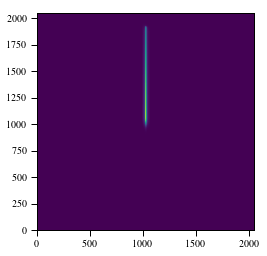

In [19]:
im = plt.imshow(simul,origin="lower")
im.set_clim(0,.1)

0.706890615007


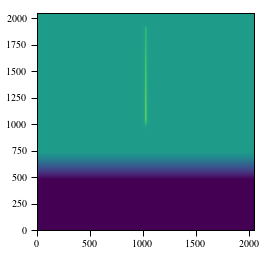

In [20]:
im = plt.imshow(simul2,origin="lower")
print np.mean(simul2)
im.set_clim(.6,1.)